In [310]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read csv files
city = pd.read_csv('raw_data/city_data.csv')
ride = pd.read_csv('raw_data/ride_data.csv')

In [311]:
# Merge datasets
city_ride = pd.merge(city, ride, on='city')

# Group by city
grouped = city_ride.groupby('city')

# Get average fare, total drivers, total rides, and city type 
avg_fare = grouped['fare'].mean()
total_rides = grouped['ride_id'].count()
total_drivers = grouped['driver_count'].mean()
city_type = grouped['type'].max()

# Create dataframe with information 
city_ride_df = pd.DataFrame({'Average Fare ($) Per City': avg_fare,
                   'Total Rides Per City': total_rides,
                   'Total Drivers Per City': total_drivers,
                   'City Type': city_type})
city_ride_df.index.name = 'City'
city_ride_df['Average Fare ($) Per City'] = city_ride_df['Average Fare ($) Per City'].map('{:.2f}'.format)

city_ride_df.head()

,Average Fare ($) Per City,City Type,Total Drivers Per City,Total Rides Per City
City,,,,
Alvarezhaven,23.93,Urban,21,31
Alyssaberg,20.61,Urban,67,26
Anitamouth,37.32,Suburban,16,9
Antoniomouth,23.62,Urban,21,22
Aprilchester,21.98,Urban,49,19


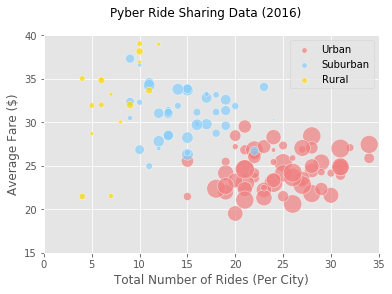

In [319]:
# Change average fare to numeric 
city_ride_df['Average Fare ($) Per City'] = pd.to_numeric(city_ride_df['Average Fare ($) Per City'])

# Create bubble plot for urban cities
urban = city_ride_df.loc[city_ride_df['City Type'] == 'Urban']
ux = urban['Total Rides Per City']
uy = urban['Average Fare ($) Per City']
uz = urban['Total Drivers Per City']

urban_plt = plt.scatter(ux, uy, s=uz*5, c='lightcoral', edgecolors='white', alpha=0.7, label='Urban')

# Create bubble plot for suburban cities
suburban = city_ride_df.loc[city_ride_df['City Type'] == 'Suburban']
sx = suburban['Total Rides Per City']
sy = suburban['Average Fare ($) Per City']
sz = suburban['Total Drivers Per City']

suburban_plt = plt.scatter(sx, sy, s=sz*5, c='lightskyblue', edgecolors='white', alpha=0.7, label='Suburban')

# Create bubble plot for rural cities
rural = city_ride_df.loc[city_ride_df['City Type'] == 'Rural']
rx = rural['Total Rides Per City']
ry = rural['Average Fare ($) Per City']
rz = rural['Total Drivers Per City']

rural_plt = plt.scatter(rx, ry, s=rz*5, c='gold', edgecolors='white', alpha=0.7, label='Rural')

# Set axis limits and labels
plt.ylim(15, 40)
plt.xlim(0, 35)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Use suptitle for entire figure 
plt.suptitle('Pyber Ride Sharing Data (2016)')

# Create legend and format legend markers
legend = plt.legend(loc = "best", numpoints = 1, fontsize = 10)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Show all bubble plots
plt.show()

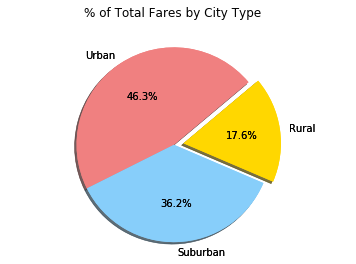

In [316]:
# Calculate % of total fares by city type
total_fares = city_ride_df['Average Fare ($) Per City'].sum()
u_fare = urban['Average Fare ($) Per City'].sum()
u_slice = u_fare/total_fares * 100

sub_fare = suburban['Average Fare ($) Per City'].sum()
sub_slice = sub_fare/total_fares * 100

r_fare = rural['Average Fare ($) Per City'].sum()
r_slice = r_fare/total_fares * 100

# Create pie chart 
labels = ['Urban', 'Suburban', 'Rural']
sizes = [u_slice, sub_slice, r_slice]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=40)

# Create title
plt.suptitle('% of Total Fares by City Type')

# Set axis to equal for a circular piechart
plt.axis('equal')

# Show pie chart
plt.show()

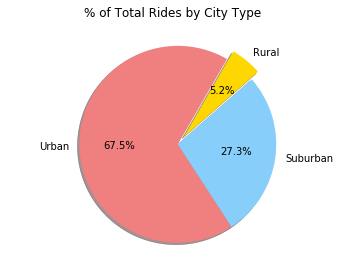

In [321]:
# Calculate % of total rides by city type
total_rides = city_ride_df['Total Rides Per City'].sum()
u_ride = urban['Total Rides Per City'].sum()
ur_slice = u_ride/total_rides * 100

sub_ride = suburban['Total Rides Per City'].sum()
subr_slice = sub_ride/total_rides * 100

r_ride = rural['Total Rides Per City'].sum()
rr_slice = r_ride/total_rides * 100

# Create pie chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [ur_slice, subr_slice, rr_slice]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=60)

# Create title and set axis to equal
plt.suptitle('% of Total Rides by City Type')
plt.axis('equal')

# Show pie chart
plt.show()

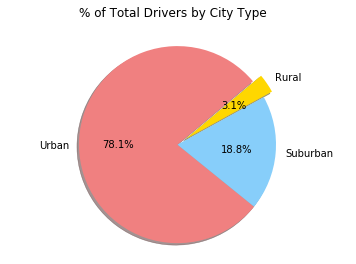

In [320]:
# Calculate % of total drivers by city type
total_drivers = city_ride_df['Total Drivers Per City'].sum()
u_drive = urban['Total Drivers Per City'].sum()
ud_slice = u_drive/total_drivers * 100

sub_drive = suburban['Total Drivers Per City'].sum()
subd_slice = sub_drive/total_drivers * 100

r_drive = rural['Total Drivers Per City'].sum()
rd_slice = r_drive/total_drivers * 100

# Create pie chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [ud_slice, subd_slice, rd_slice]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=40)

# Create title and set axis to equal
plt.suptitle('% of Total Drivers by City Type')
plt.axis('equal')

# Show pie chart
plt.show()